In [27]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [28]:
def format_polynom(polynom_str):
    polynom_str = re.sub('--', '+', polynom_str)
    polynom_str = re.sub(r'\+-', '-', polynom_str)
    polynom_str = re.sub('-', ' - ', polynom_str)
    polynom_str = re.sub(r'\+', ' + ', polynom_str)
    
    return polynom_str

In [29]:
def tridiagonal_solve(A, b):
    n = len(A)
    v = [0 for _ in range(n)]
    u = [0 for _ in range(n)]
    v[0] = A[0][1] / -A[0][0]
    u[0] = b[0] / A[0][0]

    for i in range(1, n-1):
        v[i] = A[i][2] / (-A[i][1] - A[i][0] * v[i-1])
        u[i] = (A[i][0] * u[i-1] - b[i]) / (-A[i][1] - A[i][0] * v[i-1])

    v[n-1] = 0
    u[n-1] = (A[n-1][1] * u[n-2] - b[n-1]) / (-A[n-1][2] - A[n-1][1] * v[n-2])
    x = [0 for _ in range(n)]
    x[n-1] = u[n-1]

    for i in range(n-1, 0, -1):
        x[i-1] = v[i-1] * x[i] + u[i-1]

    return x

In [30]:
def s(a, b, c, d, x):
    return a + b * x + c * x**2 + d * x**3

def spline_interpolation(x_i, f_i, x_):
    assert len(x_i) == len(f_i)

    n = len(x_i)
    h = [x_i[i] - x_i[i - 1] for i in range(1, len(x_i))]
    A = [[0 for _ in range(len(h)-1)] for _ in range(len(h)-1)]
    A[0][0] = 2 * (h[0] + h[1])
    A[0][1] = h[1]
    
    for i in range(1, len(A) - 1):
        A[i][0] = h[i-1]
        A[i][1] = 2 * (h[i-1] + h[i])
        A[i][2] = h[i]

    A[-1][-2] = h[-2]
    A[-1][-1] = 2 * (h[-2] + h[-1])

    m = [3.0 * ((f_i[i+1] - f_i[i]) / h[i] - (f_i[i] - f_i[i-1]) / h[i-1])
         for i in range(1, len(h))]

    c = [0] + tridiagonal_solve(A, m)

    a = [f_i[i - 1] for i in range(1, n)]

    b = [(f_i[i] - f_i[i-1]) / h[i-1] - (h[i-1] / 3.0) * (2.0 * c[i-1] + c[i])
         for i in range(1, len(h))]
    
    b.append((f_i[-1] - f_i[-2]) / h[-1] - (2.0 * h[-1] * c[-1]) / 3.0)

    d = [(c[i] - c[i-1]) / (3.0 * h[i-1]) for i in range(1, len(h))]
    d.append(-c[-1] / (3.0 * h[-1]))

    for interval in range(len(x_i)):
        if x_i[interval] <= x_ < x_i[interval + 1]:
            i = interval
            break

    y_test = s(a[i + 1], b[i + 1], c[i + 1], d[i + 1], x_ - x_i[i])

    return a, b, c, d, y_test

def draw_plot(x_original, f_original, a, b, c, d):
    x, y = [], []

    for i in range(len(x_original) - 1):
        x1 = np.linspace(x_original[i], x_original[i + 1], 10)
        y1 = [s(a[i], b[i], c[i], d[i], j - x_original[i]) for j in x1]
        x.append(x1)
        y.append(y1)

    plt.scatter(x_original, f_original, color='r')

    for i in range(len(x_original) - 1):
        plt.plot(x[i], y[i], color='b')

    plt.title('03-02')
    plt.show()

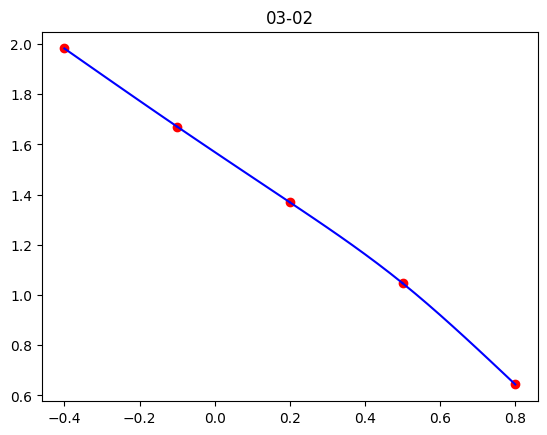

In [31]:
x_i = np.array([-0.4, -0.1, 0.2, 0.5, 0.8])
f_i = np.array([1.9823, 1.6710, 1.3694, 1.0472, 0.64350])
x_ = 0.1

a, b, c, d, y = spline_interpolation(x_i, f_i, x_)

draw_plot(x_i, f_i, a, b, c, d)

In [32]:
for i in range(len(x_i) - 1):
    print(f"[{x_i[i]}; {x_i[i+1]})\n")
    polynom = f's(x) = {a[i]:}+{b[i]:.4f}(x-{x_i[i]:.4f})+' \
              f'{c[i]:.4f}(x-{x_i[i]:.4f})^2+{d[i]:.4f}(x-{x_i[i]:.4f})^3'
    print(f"" + format_polynom(polynom) + '\n')

[-0.4; -0.1)

s(x) = 1.9823 - 1.0464(x + 0.4000) + 0.0000(x + 0.4000)^2 + 0.0968(x + 0.4000)^3

[-0.1; 0.2)

s(x) = 1.671 - 1.0202(x + 0.1000) + 0.0871(x + 0.1000)^2 - 0.1249(x + 0.1000)^3

[0.2; 0.5)

s(x) = 1.3694 - 1.0017(x - 0.2000) - 0.0252(x - 0.2000)^2 - 0.7196(x - 0.2000)^3

[0.5; 0.8)

s(x) = 1.0472 - 1.2111(x - 0.5000) - 0.6729(x - 0.5000)^2 + 0.7476(x - 0.5000)^3

